# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [176]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [37]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

df = pd.DataFrame(student_data)
df

,Edad,Retrasos
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Dibuja un diagrama de dispersión (scatter plot) para los datos.

<Axes: xlabel='Edad', ylabel='Retrasos'>

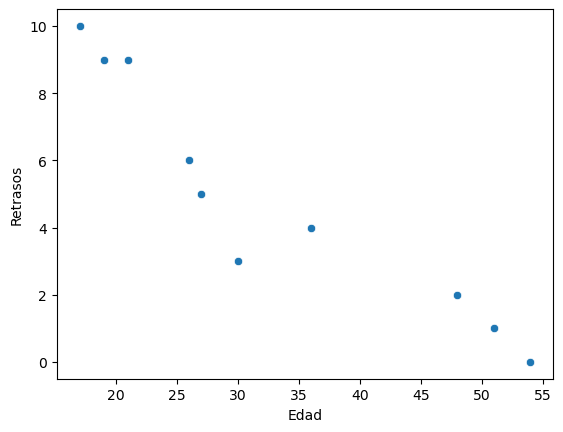

In [39]:
sns.scatterplot(x='Edad', y='Retrasos', data=df)

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

De acuerdo al scatterplot, parece evidente que a mayor edad, el número de retrasos disminuye.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [43]:
# COV: mide cómo dos var cambian juntas -> -45,57 indica que hay una relación inversa entre Edad y Retrasos (a mayor Edad, menores retrasos)
covarianza = df.cov() 
covarianza

,Edad,Retrasos
Edad,187.655556,-45.566667
Retrasos,-45.566667,12.544444


In [44]:
# CORR : mide relación lineal entre dos var (entre -1 y 1) -> -0.94 indica una rel. lineal negativa muy fuerte entre Edad y Retrasos (a mayor Edad, menores retrasos, independientemente de ud. medida)
correlacion = df.corr() # 
correlacion

,Edad,Retrasos
Edad,1.000000,-0.939163
Retrasos,-0.939163,1.000000


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [158]:
X = df['Edad'].values.reshape(-1, 1) # Variable independiente (predictora), convertida a array 2D para que la acepte el modelo
y = df['Retrasos'] # Variable dependiente (respuesta) -> Esta será mi variable de resultado

# Modelo de Regresión Lineal
model = LinearRegression() # Instanciamos el modelo
model.fit(X, y) # Ajustamos el modelo usando los datos de X e y (Fit encuentra mejores coef intercepto y pendiente)

# Predicciones
y_pred = model.predict(X) # Usa el modelo ajustado para predecir los valores de y ("Retrasos"), basado en X ("Edad")

# Coefs: Intercepto (valor de la variable dependiente cuando la independiente es 0), Pendiente: (cambio en la variable dependiente por cada unidad de cambio en la variable independiente)
print(model.intercept_, model.coef_)


12.888803363135771 [-0.24282077]


Grafica tu modelo de regresión en tu diagrama de dispersión.

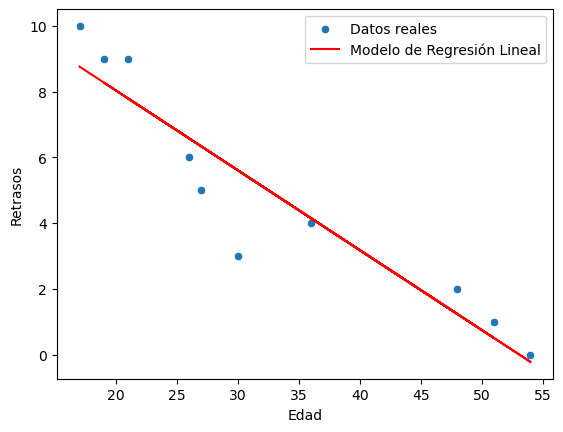

In [73]:
sns.scatterplot(x='Edad', y='Retrasos', data=df, label='Datos reales')
#Línea de regresión con los valores de X "Edad" y los predicciones y_pred de "Retrasos"
plt.plot(df['Edad'], y_pred, color='red', label='Modelo de Regresión Lineal')
plt.legend()
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

En este caso, la predicción del modelo de regresión lineal se ajusta bastante bien a nuestros datos reales, aunque observamos algunas desviaciones que podrían ser mejor predichas con modelos no lineales.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [125]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('data/vehicles.csv')
filtro = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles = vehicles[filtro]
vehicles

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [152]:
# y = vehicles['CO2 Emission Grams/Mile'] # variable resultado
correlacion_v = vehicles.corr()
# correlacion_v
correlacion_co2 = correlacion_v['CO2 Emission Grams/Mile'].sort_values(ascending=False) 
correlacion_co2 
# La var más correlacionada con las Emisiones y por lo tanto la más importante es Fuel Barrels/Year
# La var menos correlacionada y menos interesante es "Year"

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [166]:
# Definición de variables
X = vehicles.drop(columns=['CO2 Emission Grams/Mile']) # independientes
y = vehicles['CO2 Emission Grams/Mile'] # dependiente

# Creación del Modelo de Regresión Linea y Ajuste
model = LinearRegression()
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Utilizamos un Modelo de Regresión Lineal Múltiple donde se predice la var dependiente 'CO2 Emission Grams/Mile' (y_pred) en función de múltiples var independientes (X)

In [178]:
## EXTRA con OLS  para obtener más detalles estadísticos
# Agregar una constante a X para el modelo OLS
X = sm.add_constant(X)

# Creación del modelo de regresión lineal y ajuste usando OLS
modelo_ols = sm.OLS(y, X).fit() # Ordinary Least Squares
modelo_ols_summary = modelo_ols.summary()
modelo_smf_summary


"""
R-squared:	0.981 : El 98,1% de la variabilidad en las emisiones de CO2 se explica por las variables independientes
[0.025	0.975]: Intervalo de confianza al 95% para el coef
Skew:	15.902	(distribución de residuos): Alto, sesgada hacia derecha (valores residuales altos)
Kurtosis:	407.766 (puntiagudez de la distribución de residuos): Muy alto (>3) Muchos outliers que se alejan de la media

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Q("CO2 Emission Grams/Mile")   R-squared:                       0.981
Model:                                      OLS   Adj. R-squared:                  0.981
Method:                           Least Squares   F-statistic:                 3.687e+05
Date:                          Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                                  13:07:11   Log-Likelihood:            -1.5173e+05
No. Observations:                         35952   AIC:                         3.035e+05
Df Residuals:                             35946   BIC:                         3.035e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                769.8883     19.392     39.702      0.000     731.880     807.897
Q("Year")                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Q("Cylinders")             1.8788      0.083     22.598      0.000       1.716       2.042
Q("Fuel Barrels/Year")    19.0529      0.061    311.600      0.000      18.933      19.173
Q("Combined MPG")         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Q("Fuel Cost/Year")        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [164]:
# Coefs
print(f"Interception: {model.intercept_},  \nSlope:{model.coef_}")
"""
Intercept	769.8883 : Valor esperado de emisiones de CO2 cuando todas las cariables independientes son 0
##
Slope: 
'Year': -0.32 : Un aumento de un año en el modelo del vehículo se asocia con una dismiución de 0.32 gramos/milla en emisiones de CO2
'Cylinders' : 1.87: Cada cilindro adicional se asocia con un aumento de 1.87 gramos/milla de CO2
'Fuel Barrels/Year': 19.05: Cada barril de combustible adicional consumido se asocia con un aumento de 19.05 gramos/milla de CO2
'Combined MPG',: -3.04: Un aumento de milla por galón (MPG) en el rendimiento combinado de combustible se asocia con una disminución de 3.04 gramos/milla de CO2
'Fuel Cost/Year':  0.032: Un aumento del coste anual de combustible se asocia con un aumento de 0.032 gramos/milla de CO2
"""

Interception: 769.888283646543,  
Slope:[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [199]:
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

df = pd.DataFrame(data)

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [202]:
X = np.array(df["X"]).reshape(-1,1)
y = df["Y"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Coefs
print(f"Interception: {model.intercept_},  \nSlope:{model.coef_}")

Interception: -0.43939393939393767,  
Slope:[0.84848485]


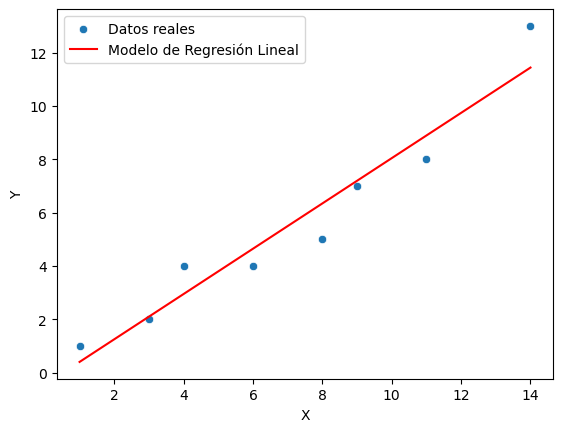

In [204]:
sns.scatterplot(x='X', y='Y', data=df, label='Datos reales')
plt.plot(df['X'], y_pred, color='red', label='Modelo de Regresión Lineal')
plt.legend()
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

In [207]:
# Coefs
print(f"Interception: {model.intercept_},  \nSlope:{model.coef_}")

Interception: -0.43939393939393767,  
Slope:[0.84848485]


Por cada persona invitada, se espera que asistan 0.84 personas en promedio. Hay una relación positiva, invitar a más persona aumenta el número de invitados.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

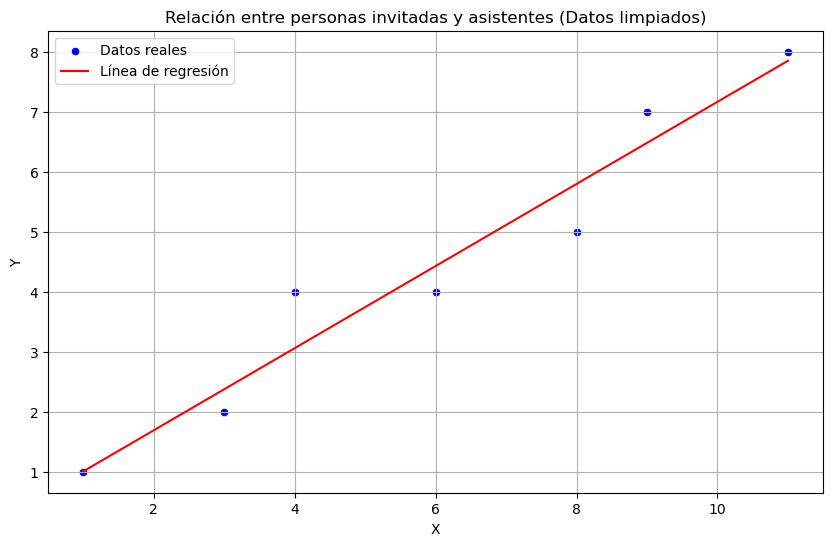

In [223]:
# Identificar y eliminar los valores atípicos
df_cleaned = df[(df['X'] != 14) & (df['Y'] != 13)]

X_cleaned = np.array(df_cleaned["X"]).reshape(-1, 1)
y_cleaned = df_cleaned["Y"]

model = LinearRegression()
model.fit(X_cleaned, y_cleaned)

y_pred = model.predict(X_cleaned)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df_cleaned, color='blue', label='Datos reales')
plt.plot(df_cleaned['X'], y_pred, color='red', label='Línea de regresión')
plt.title('Relación entre personas invitadas y asistentes (Datos limpiados)')
plt.legend()
plt.grid(True)
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*

In [ ]:
Eliminando los outliers, el modelo de regresión lineal se ajusta mucho mejor a mis datos reales